**Regresión lineal simple.**

*Usando 60% para train y 40% para test.*

Hello, I'm Go1234550

Importamos las librerías y leemos nuestro dataset.

In [26]:
import pandas as pd
import random as rd 
import matplotlib.pyplot as plt

full_data_file=pd.read_csv('car_purchasing.csv',header=0,encoding='latin-1')
full_data_file

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


Extraemos los datos que utilizaremos: 60% para el conjunto de entrenamiento y 40% para el conjunto de pruebas.

In [27]:
#Extracción de datos que utilizaremos por coordenadas
#Annual Salary
x=pd.read_csv('car_purchasing.csv',usecols=[5], encoding='latin-1').values
#Car Purchase Amount
y=pd.read_csv('car_purchasing.csv',usecols=[8], encoding='latin-1').values

# Determinamos la cantidad de muestras para el conjunto train
train_size = int(0.6 * len(x))

# Creamos una lista de indices que corresponden a las muestras que tomaremos
idx = list(range(len(x)))
rd.shuffle(idx) #Los randomizamos para que la se realice el modelo de una mejor calidad

# Seleccionamos las muestras aleatorias para ek conjunto de entrenamiento
x_train = [x[i] for i in idx[:train_size]]
y_train = [y[i] for i in idx[:train_size]]

# Seleccionamos las muestras aleatorias para el conjunto de test
x_test = [x[i] for i in idx[train_size:]]
y_test = [y[i] for i in idx[train_size:]]

**Entrenamiento del modelo.**

Calculamos las medias.

In [28]:
mean_x = sum(x_train)/len(x_train)
mean_y = sum(y_train)/len(y_train)

Calculamos la pendiente *(m)* y el intercepto *(b)*.

In [29]:
numerator =  sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
denominator = sum((xi - mean_x)**2 for xi in x)

m = numerator / denominator
b = mean_y - m * mean_x

**Prueba del modelo.**

Realizamos las predicciones.

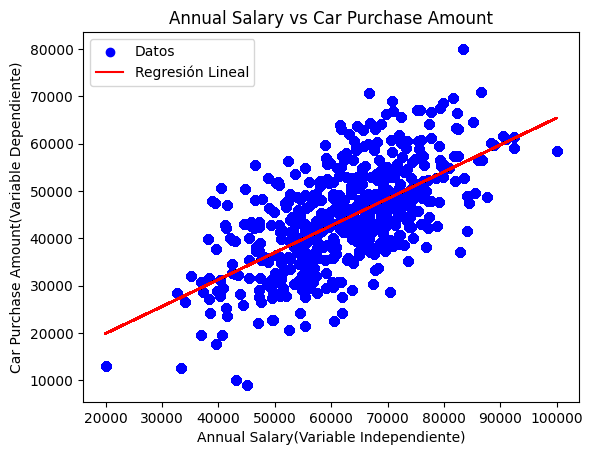

In [30]:
for xi in x_train:
    y_pred = m * xi + b
    #Visuzalización de los datos
    plt.scatter(x, y,color='blue')
    plt.plot(x, m*x+b, color='red')
    plt.xlabel('Annual Salary(Variable Independiente)')
    plt.ylabel('Car Purchase Amount(Variable Dependiente)')
    plt.title('Annual Salary vs Car Purchase Amount')
plt.legend(['Datos','Regresión Lineal'])
plt.show()



Calculamos el MSE y SSD.

In [31]:
# Calculo de la distancia entre cada punto y la línea de regresión
distancias = [abs(yi - m * xi - b) for xi, yi in zip(x_train,y_train)]

#Obtenemos la Suma de las Diferencias Cuadradas (SSD)
ssd = sum(d**2 for d in distancias)

#Calculo del Error Cuadrático Medio (MSE)
mse = sum((yi - m * xi - b)**2 for xi, yi in zip(x_train,y_train)) / len(x_train)

In [32]:
#Impresión de los resultados
print('Coeficiente (pendiente m): ',m)
print('Intercepto(b): ', b)
print('SSD: ', ssd)
print('MSE: ', mse)

Coeficiente (pendiente m):  [0.56888807]
Intercepto(b):  [8512.35866809]
SSD:  [1.99624883e+10]
MSE:  [66541627.67614236]
